# Decision Tree ID3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from d_tree.decision_tree import DecisionTree

## Importando e visualização básica do dataset

In [2]:
df = pd.read_csv('dataset/test_scores.xls')
df['Succeeded'] = df[['math score', 'reading score', 'writing score']].astype(int).sum(1)
df['Succeeded'] = df['Succeeded'].astype(int).divide(3)
df['Succeeded'] = df['Succeeded'].apply(lambda x: 'yes' if x >= 70.0 else 'no')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Succeeded
0,female,group B,bachelor's degree,standard,none,72,72,74,yes
1,female,group C,some college,standard,completed,69,90,88,yes
2,female,group B,master's degree,standard,none,90,95,93,yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,no
4,male,group C,some college,standard,none,76,78,75,yes


## Explorando o dataset

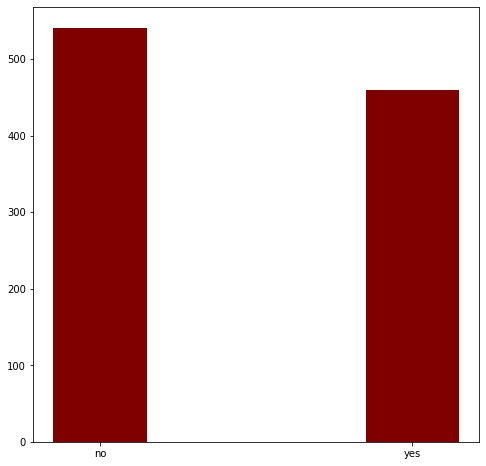

In [3]:
plt.figure(figsize=(8,8))
v = df['Succeeded'].value_counts()
plt.bar(list(v.keys()), list(v), color='maroon',width=.3)
plt.show()

## Separando dataset em treino e teste

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, _, _ = train_test_split(df, df['Succeeded'], test_size=0.2, random_state=0)

In [5]:
print(f"{X_train.shape[0]} dados para treino e {X_test.shape[0]} para teste")

800 dados para treino e 200 para teste


## Instanciando e treinando o modelo

In [6]:
decision_tree = DecisionTree(X_train, 'Succeeded')
tree = decision_tree.id3()

**Salvando o modelo para poder ser utilizado posteriormente sem necessitar de treinamento**

In [7]:
import json
with open('model/decision_tree.txt', 'w') as f:
    file = f.write(str(tree))

FileNotFoundError: [Errno 2] No such file or directory: 'model/decision_tree.txt'

## Acurácia do modelo

In [ ]:
decision_tree.evaluate(tree, X_test)

0.76

## Testando predição do modelo utilizando arquivo persistido em memória

In [ ]:
import ast

predict_test = X_test.iloc[5]
correct_value = predict_test['Succeeded']
predict_test = predict_test.drop('Succeeded')

with open('model/decision_tree.txt', 'r') as f:
    data = f.read()
    tree = ast.literal_eval(data)
    prediction = decision_tree.predict(tree, predict_test)
    print(f'O valor correto é: {correct_value}')
    print(f'O valor que o modelo previu foi: {prediction}')

O valor correto é: yes
O valor que o modelo previu foi: yes
